<a href="https://colab.research.google.com/github/ktonon0401/AI-training/blob/main/CNN_Money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [157]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.layers.convolutional import Conv2D,MaxPooling2D
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, Flatten

In [158]:
dir_path = '/content/drive/MyDrive/AI_Colab/Data_tienVN'
path_img = []

listdir = os.listdir(dir_path)
for i in range(len(listdir)):
  listdir[i] = int(listdir[i])
listdir.sort()
for k in range(len(listdir)):
  listdir[k] = str(listdir[k])

labels = listdir
x_train = []
y_train = []

In [159]:
w = 128
h = 64
for i in labels:
  path_class = os.path.join(dir_path,i)
  index_label = labels.index(i)
  for j in os.listdir(path_class):
    path_img = os.path.join(path_class,j)
    img = load_img(path_img,target_size=(h,w))
    img = img_to_array(img)
    img = img.astype('float32')
    img = img/255
    x_train.append(img)
    y_train.append(index_label)

In [160]:
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = to_categorical(y_train)

In [190]:
# Initialize the CNN
model = Sequential()
# Convolution
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(h,w,3)))
# A second convolution layer
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
# Pooling
model.add(MaxPooling2D((2,2)))

# # Initialize the CNN
# model = Sequential()
# # Convolution
# model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(h,w,3)))
# # A second convolution layer
# model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
# # A third convolution layer
# model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
# # Pooling
# model.add(MaxPooling2D((2,2)))

# # Initialize the CNN
# model = Sequential()
# # Convolution
# model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(h,w,3)))
# # A second convolution layer
# model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
# # A third convolution layer
# model.add(Conv2D(128,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
# # Pooling
# model.add(MaxPooling2D((2,2)))

# Flattening
model.add(Flatten())
# Full connection
model.add(Flatten())
model.add(Dense(512,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(512,activation = 'relu',kernel_initializer='he_uniform'))
model.add(Dense(len(listdir),activation = 'softmax'))


In [191]:
opt = SGD(learning_rate=0.01,momentum=0.9)
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=128,verbose=1)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 2.7937 - accuracy: 0.1200
Epoch 2/10
1/1 [==============================] - 1s 1s/step - loss: 15.8990 - accuracy: 0.1000
Epoch 3/10
1/1 [==============================] - 1s 1s/step - loss: 3.4421 - accuracy: 0.2400
Epoch 4/10
1/1 [==============================] - 1s 1s/step - loss: 2.4229 - accuracy: 0.2200
Epoch 5/10
1/1 [==============================] - 1s 1s/step - loss: 2.1460 - accuracy: 0.1800
Epoch 6/10
1/1 [==============================] - 1s 1s/step - loss: 2.0429 - accuracy: 0.1800
Epoch 7/10
1/1 [==============================] - 1s 1s/step - loss: 2.0136 - accuracy: 0.1800
Epoch 8/10
1/1 [==============================] - 1s 1s/step - loss: 1.9861 - accuracy: 0.3000
Epoch 9/10
1/1 [==============================] - 1s 1s/step - loss: 1.9598 - accuracy: 0.3800
Epoch 10/10
1/1 [==============================] - 1s 1s/step - loss: 1.9241 - accuracy: 0.4000


In [192]:
model.save('/content/drive/MyDrive/AI_Colab/H5files/money.h5')
model_pre=load_model('/content/drive/MyDrive/AI_Colab/H5files/money.h5')

(1, 64, 128, 3)

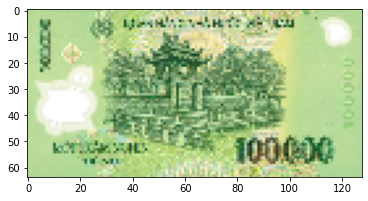

In [193]:
img=load_img('/content/drive/MyDrive/AI_Colab/Data_tienVN/100000/100000_1.jpg',target_size=(h,w))
plt.imshow(img)
img=img_to_array(img)
img=img.reshape(1,h,w,3)
img=img.astype('float32')
img=img/255
img.shape

In [194]:
arr = np.argmax(model_pre.predict(img),axis=1)
# hinhnao = labels[index]
index = arr.tolist()
print("Predict",labels[index[0]],"VND")

Predict 100000 VND
